In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

Step 1: read in data from the .xls file

In [2]:
DATA_FILE = '../data/fire_theft.xls'

book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

Step 2: create placeholders for input X (number of fire) and label Y (number of theft)

In [3]:
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

Step 3: create weight and bias, initialized to 0

In [4]:
w = tf.Variable(0.0, name='w')
b = tf.Variable(0.0, name='b')

Step 4: build model to predict Y

In [5]:
Y_predicted = w * X + b

Step 5: use the square error as the loss function

In [6]:
loss = tf.square(Y - Y_predicted)

Step 5a: implement Huber loss function from lecture and try it out

In [7]:
def huber_loss(labels, predictions, delta=1.0):
    residual = tf.abs(predictions - labels)
    condition = tf.less(residual, delta)
    small_res = 0.5 * tf.square(residual)
    large_res = delta * residual - 0.5*tf.square(delta)
    return tf.where(condition, small_res, large_res)

In [8]:
loss = huber_loss(Y, Y_predicted)

Step 6: using gradient descent with learning rate of 0.01 to minimize loss

In [9]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [10]:
sess = tf.Session() # prefer with tf.Session() as sess: in your code

Step 7: initialize the necessary variables, in this case, w and b

In [11]:
sess.run(tf.global_variables_initializer())
writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)

Step 8: train the model

In [12]:
for i in range(50): # train the model 50 epochs
    total_loss = 0
    for x, y in data:
        # Session runs train_op and fetch values of loss
        _, l = sess.run([optimizer, loss], feed_dict={X:x, Y:y})
        total_loss += l
    print('Epoch {0}: {1}'.format(i, total_loss/float(n_samples)))

# close the writer when you're done using it
writer.close() 

Epoch 0: 30.231313444319227
Epoch 1: 24.488211881546746
Epoch 2: 19.95247097987504
Epoch 3: 18.415514595407462
Epoch 4: 17.62403281920013
Epoch 5: 17.08878264540718
Epoch 6: 16.827302360641106
Epoch 7: 16.676950227957043
Epoch 8: 16.589362557090464
Epoch 9: 16.547880798134777
Epoch 10: 16.54316401366322
Epoch 11: 16.53523531635957
Epoch 12: 16.527739029466396
Epoch 13: 16.520207939580793
Epoch 14: 16.51269836031965
Epoch 15: 16.505204298932636
Epoch 16: 16.497726049274206
Epoch 17: 16.490262628311203
Epoch 18: 16.48281567916274
Epoch 19: 16.475384406479343
Epoch 20: 16.467968803342607
Epoch 21: 16.460568067573366
Epoch 22: 16.453183558459084
Epoch 23: 16.445813909350406
Epoch 24: 16.438459956220218
Epoch 25: 16.431121296870213
Epoch 26: 16.42379860965801
Epoch 27: 16.41649028893915
Epoch 28: 16.409198701381683
Epoch 29: 16.401921452111786
Epoch 30: 16.394659822185833
Epoch 31: 16.38741318797249
Epoch 32: 16.38018172096816
Epoch 33: 16.37296574961926
Epoch 34: 16.36576510500163
Epoch 35

Step 9: output the values of w and b

In [13]:
w, b = sess.run([w, b])

Step 10: plot the results

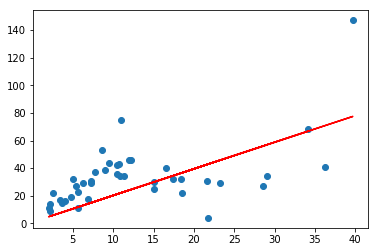

In [14]:
X, Y = data[:, 0], data[:, 1]
plt.scatter(X, Y, label="Real data")
plt.plot(X, w * X + b, label="Predicted data", color='r')
plt.show()